In [1]:
#레버리지: 실제값이 예측값에 미치는 영향을 나타낸 값
from sklearn.datasets import make_regression
#샘플데이터 생성
X0, y, coef = make_regression(n_samples=100, n_features=1, noise=20, coef=True, random_state=1)

In [7]:
import numpy as np
import statsmodels.api as sm
data_100 = (4,300)
data_101 = (3, 150)
X0 = np.vstack([X0, np.array([data_100[:1], data_101[:1]])])

X=sm.add_constant(X0)
y = np.hstack([y, [data_100[1], data_101[1]]])

Text(0.5, 1.0, 'Regression')

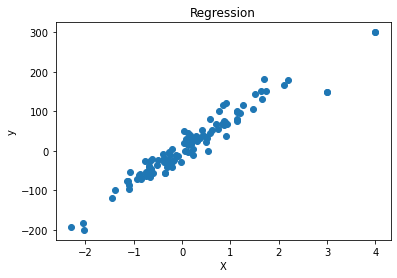

In [8]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.scatter(X0, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Regression')

In [9]:
import pandas as pd
model = sm.OLS(pd.DataFrame(y), pd.DataFrame(X))

result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     1466.
Date:                Mon, 06 Dec 2021   Prob (F-statistic):           2.43e-62
Time:                        12:54:25   Log-Likelihood:                -468.66
No. Observations:                 104   AIC:                             941.3
Df Residuals:                     102   BIC:                             946.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
0              2.7285      2.204      1.238      0.2

Text(0.5, 1.0, 'leverage')

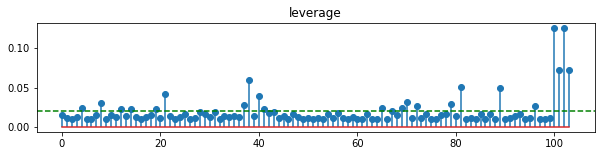

In [10]:
influence = result.get_influence() #영향도
hat = influence.hat_matrix_diag #레버리지 벡터
plt.figure(figsize=(10,2))
plt.stem(hat) #막대그래프와 달리 가로폭이 없는 그래프
plt.axhline(0.02, c='g', ls='--')
plt.title('leverage')

In [11]:
hat.sum() #레버리지 합계

2.0

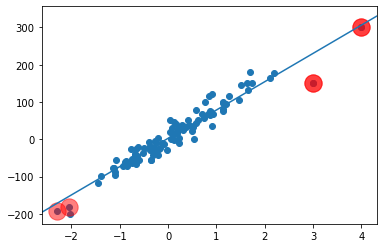

In [12]:
ax = plt.subplot()
plt.scatter(X0, y)
sm.graphics.abline_plot(model_results=result, ax=ax)

idx = hat > 0.05
plt.scatter(X0[idx], y[idx], s=300, c='r', alpha=0.5)
plt.show()

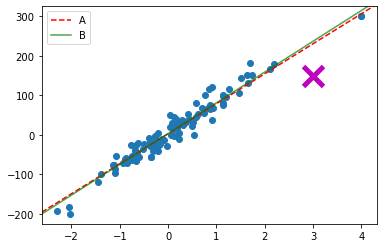

In [13]:
model2 = sm.OLS(y[:-1],X[:-1])
result2 = model2.fit()

ax = plt.subplot()
plt.scatter(X0,y)
sm.graphics.abline_plot(model_results=result, c='r', linestyle='--', ax=ax, label='A')

sm.graphics.abline_plot(model_results=result2, c='g', alpha=0.7, ax=ax, label='B')

plt.plot(X0[-1], y[-1], marker='x', c='m', ms=20, mew=5)
plt.legend()
plt.show()

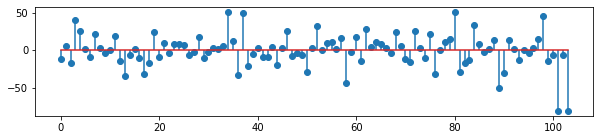

In [14]:
plt.figure(figsize=(10,2))
plt.stem(result.resid)
plt.show()

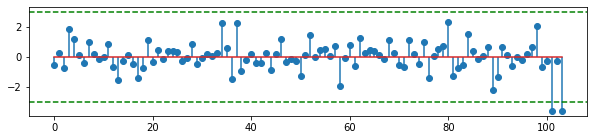

In [15]:
plt.figure(figsize=(10,2))
plt.stem(result.resid_pearson)
plt.axhline(3, c='g', ls='--')
plt.axhline(-3, c='g', ls='--')
plt.show()

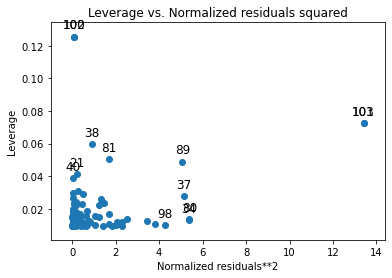

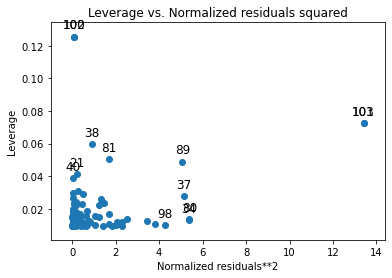

In [16]:
sm.graphics.plot_leverage_resid2(result)


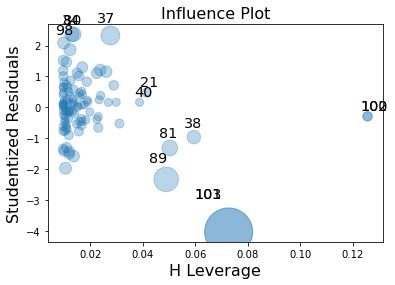

In [17]:
#레버리지와 잔차의 크기가 모두 큰 데이터들을 시각적으로 표현
sm.graphics.influence_plot(result, plot_alpha=0.3)
plt.show()

In [18]:
from sklearn.datasets import load_boston
boston=load_boston()

In [19]:
dfX0 = pd.DataFrame(boston.data, columns=boston.feature_names)
dfX = sm.add_constant(dfX0)
dfy = pd.DataFrame(boston.target, columns=['MEDV'])

In [20]:
model_boston = sm.OLS(dfy, dfX)
result_boston = model_boston.fit()
print(result_boston.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          6.72e-135
Time:                        13:12:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.0

<AxesSubplot:>

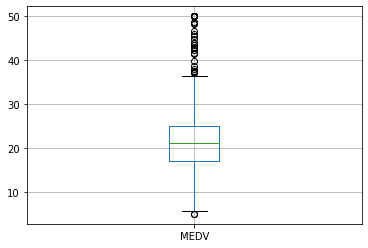

In [21]:
dfy.boxplot()

In [22]:
dfy.loc[dfy.MEDV >= 40, 'MEDV']=40
model_boston2 = sm.OLS(dfy, dfX)
result_boston2 = model_boston2.fit()
result_boston2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          2.23e-153
Time:                        13:13:42   Log-Likelihood:                -1385.7
No. Observations:                 506   AIC:                             2799.
Df Residuals:                     492   BIC:                             2859.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1624      4.081      9.350      0.000      30.143      46.182
CRIM          -0.1109      0.026     -4.219      0.000      -0.163      -0.059
ZN             0.0370      0.011      3.374      0.001       0.015       0.059
INDUS         -0.0139      0.049     -0.283      0.777      -0.111       0.083
CHAS           1.7865      0.689      2.593      0.010       0.433       3.140
NOX          -15.4649      3.055     -5.062      0.000     -21.467      -9.463
RM             2.8793      0.334      8.615      0.000       2.223       3.536
AGE           -0.0060      0.011     -0.567      0.571      -0.027       0.015
DIS           -1.2519      0.160     -7.848      0.000      -1.565      -0.938
RAD            0.2704      0.053      5.096      0.000       0.166       0.375
TAX           -0.0116      0.003     -3.867      0.000      -0.018      -0.006
PTRATIO       -0.8203      0.105     -7.840      0.000      -1.026      -0.615
B              0.0083      0.002      3.843      0.000       0.004       0.012
LSTAT         -0.4797      0.041    -11.828      0.000      -0.559      -0.400
==============================================================================
Omnibus:                       93.466   Durbin-Watson:                   1.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              210.094
Skew:                           0.971   Prob(JB):                     2.39e-46
Kurtosis:                       5.488   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
#주택 가격이 40이상인 값들
idx = np.where(dfy >= 40)[0]
idx

array([ 98, 157, 161, 162, 163, 166, 186, 195, 202, 203, 204, 224, 225,
       228, 232, 233, 253, 256, 257, 261, 262, 267, 268, 280, 282, 283,
       368, 369, 370, 371, 372], dtype=int64)

In [25]:
#40이상인 값들을 제거
idx2 = list(set(range(len(dfX))).difference(idx))

#reset_index를 통해 번호 재정렬
dfX = dfX.iloc[idx2, :].reset_index(drop=True)
dfy = dfy.iloc[idx2, :].reset_index(drop=True)
model_boston3 = sm.OLS(dfy, dfX)
result_boston3 = model_boston2.fit()
print(result_boston3.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.776
Method:                 Least Squares   F-statistic:                     135.8
Date:                Mon, 06 Dec 2021   Prob (F-statistic):          2.23e-153
Time:                        13:16:16   Log-Likelihood:                -1385.7
No. Observations:                 506   AIC:                             2799.
Df Residuals:                     492   BIC:                             2859.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         38.1624      4.081      9.350      0.0